## Temperature-Salinity Diagrams
Author: McKenzie Larson

Help from: https://oceanpython.org/2013/02/17/t-s-diagram/

In [1]:
import warnings
warnings.filterwarnings('ignore')
import functions
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np
matplotlib.rcParams.update({'font.size': 16})
import gsw

Import data

In [2]:
ds_output_zlev5km = xr.open_dataset('/pscratch/sd/m/mlarson/RK4/z-lev_5km//ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/output.nc')
ds_output_zstar5km = xr.open_dataset('/pscratch/sd/m/mlarson/RK4/z-star_5km//ocean/isomip_plus/planar/5km/z-star/Ocean0/simulation/output.nc')

ds_timeMonthly_zlev5km = xr.open_mfdataset('/pscratch/sd/m/mlarson/RK4/z-lev_5km/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')
ds_timeMonthly_zstar5km = xr.open_mfdataset('/pscratch/sd/m/mlarson/RK4/z-star_5km/ocean/isomip_plus/planar/5km/z-star/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')


cavityMask_zlev5km = xr.open_dataset('/pscratch/sd/m/mlarson/RK4/z-lev_5km//ocean/isomip_plus/planar/5km/z-level/Ocean0/viz/cavityMask.nc')
cavityMask_zstar5km = xr.open_dataset('/pscratch/sd/m/mlarson/RK4/z-star_5km//ocean/isomip_plus/planar/5km/z-star/Ocean0/viz/cavityMask.nc')

In [4]:
## need to convert potential temperature to conservative temperature
## https://teos-10.github.io/GSW-Python/conversions.html
## gsw.conversions.CT_from_pt(SA, pt)
## SA = absolute salinity, g/kg
## pt = potential temperature referenced to a sea pressure, degrees C

cons_temp_zlev5km = gsw.conversions.CT_from_pt(ds_output_zlev5km.salinity, ds_output_zlev5km.temperature)
cons_temp_zstar5km = gsw.conversions.CT_from_pt(ds_output_zstar5km.salinity, ds_output_zstar5km.temperature)

In [5]:
## want to only look at cells along the 40km y 
## find which indices are along the same y value
larger_same_y_idx_zlev5km = []
same_y_idx = []
y_val_start = ds_output_zlev5km.yCell[0]
for i in range(len(ds_output_zlev5km.xCell)):
    y_val = ds_output_zlev5km.yCell[i]
    if y_val == y_val_start:
        same_y_idx.append(i)
    else:
        larger_same_y_idx_zlev5km.append(same_y_idx)
        same_y_idx = []
        same_y_idx.append(i)
        y_val_start = y_val
        
larger_same_y_idx_zstar5km = []
same_y_idx = []
y_val_start = ds_output_zstar5km.yCell[0]
for i in range(len(ds_output_zstar5km.xCell)):
    y_val = ds_output_zstar5km.yCell[i]
    if y_val == y_val_start:
        same_y_idx.append(i)
    else:
        larger_same_y_idx_zstar5km.append(same_y_idx)
        same_y_idx = []
        same_y_idx.append(i)
        y_val_start = y_val

In [8]:
ds_output_zlev5km.yCell.isel(nCells=larger_same_y_idx_zlev5km[9]).values

array([41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
      

In [9]:
ds_output_zstar5km.yCell.isel(nCells=larger_same_y_idx_zstar5km[9]).values

array([41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
       41961.52422707, 41961.52422707, 41961.52422707, 41961.52422707,
      

In [6]:
## get just the cavity cell indicies
## see if the middle of the hexagon cell is in the cavity
nCell_idx_inCavity_zlev5km = []
nCell_idx_outCavity_zlev5km = []
for i in cavityMask_zlev5km.nCells.isel(nCells=larger_same_y_idx_zlev5km[9]):
    if (cavityMask_zlev5km.maxLevelCell.sel(nCells=i).values == True): ## see if the middle of the hexagon cell is in the cavity
        nCell_idx_inCavity_zlev5km.append(i)
    else:
        nCell_idx_outCavity_zlev5km.append(i)
        
## repeat for z-star
nCell_idx_inCavity_zstar5km = []
nCell_idx_outCavity_zstar5km = []
for i in cavityMask_zstar5km.nCells.isel(nCells=larger_same_y_idx_zstar5km[9]):
    if (cavityMask_zstar5km.maxLevelCell.sel(nCells=i).values == True): ## see if the middle of the hexagon cell is in the cavity
        nCell_idx_inCavity_zstar5km.append(i)
    else:
        nCell_idx_outCavity_zstar5km.append(i)

In [11]:
## get furthest x-value for each mesh:
furthest_x_zlev5km = ds_output_zlev5km.xCell.isel(nCells = nCell_idx_inCavity_zlev5km[np.argmax(ds_output_zlev5km.xCell.values)]).values
print('Largest x-value for zlev5km:', furthest_x_zlev5km)

## get furthest x-value for each mesh:
furthest_x_zstar5km = ds_output_zstar5km.xCell.isel(nCells = nCell_idx_inCavity_zstar5km[np.argmax(ds_output_zstar5km.xCell.values)]).values
print('Largest x-value for zstar5km:', furthest_x_zstar5km)

IndexError: list index out of range

Now, lets getting a little rectangle of cells in the middle of the cavity:

In [54]:
cavitySubSec_zlev5km = []
cSSlevs_match_zlev5km = []
postShelfSubSec_zlev5km = []
pSSlevs_match_zlev5km = []
for lev in range(len(ds_output_zlev5km.nVertLevels)):
    for i in nCell_idx_inCavity_zlev5km:
        if (ds_output_zlev5km.xCell.sel(nCells=i).values >= 525000 and \
           ds_output_zlev5km.xCell.sel(nCells=i).values <= 550000 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=i).values >= -550 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=i).values <= -350): 
            cavitySubSec_zlev5km.append(i.values)
            cSSlevs_match_zlev5km.append(lev)
    for j in nCell_idx_outCavity_zlev5km:
        if (ds_output_zlev5km.xCell.sel(nCells=j).values >= 650000 and \
           ds_output_zlev5km.xCell.sel(nCells=j).values <= 675000 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values >= -550 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values <= -350): 
            postShelfSubSec_zlev5km.append(j.values)
            pSSlevs_match_zlev5km.append(lev)
            
cavitySubSec_zstar5km = []
cSSlevs_match_zstar5km = []
postShelfSubSec_zstar5km = []
pSSlevs_match_zstar5km = []
for lev in range(len(ds_output_zstar5km.nVertLevels)):
    for i in nCell_idx_inCavity_zstar5km:
        if (ds_output_zstar5km.xCell.sel(nCells=i).values >= 525000 and \
           ds_output_zstar5km.xCell.sel(nCells=i).values <= 550000 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=i).values >= -550 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=i).values <= -350): 
            cavitySubSec_zstar5km.append(i.values)
            cSSlevs_match_zstar5km.append(lev)
    for j in nCell_idx_outCavity_zstar5km:
        if (ds_output_zstar5km.xCell.sel(nCells=j).values >= 650000 and \
           ds_output_zstar5km.xCell.sel(nCells=j).values <= 675000 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values >= -550 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values <= -350): 
            postShelfSubSec_zstar5km.append(j.values)
            pSSlevs_match_zstar5km.append(lev)

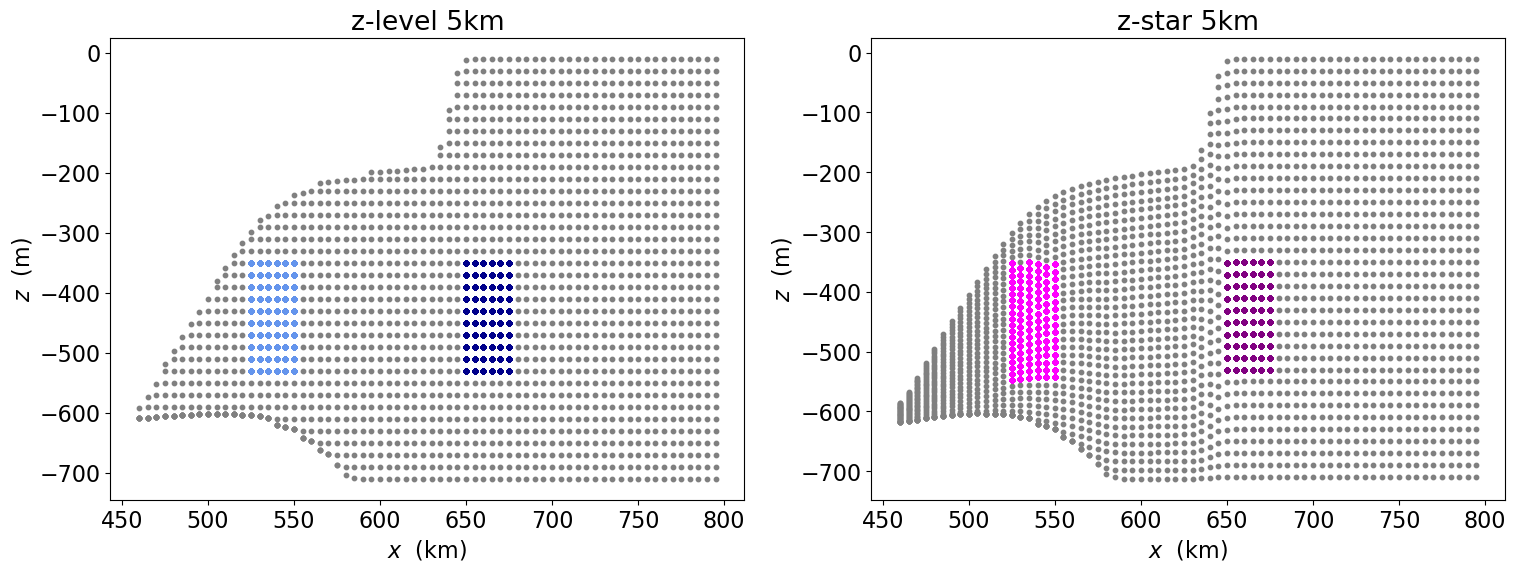

In [55]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
for i in range(len(ds_output_zlev5km.nVertLevels)):
    ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=larger_same_y_idx_zlev5km[9])/1000.,
                ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=i,nCells=larger_same_y_idx_zlev5km[9]),
               color='grey',s=10)
    for c in range(len(cavitySubSec_zlev5km)):
        ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=cavitySubSec_zlev5km[c])/1000.,
                ds_output_zlev5km.zMid.isel(Time=0,nCells=cavitySubSec_zlev5km[c],nVertLevels=cSSlevs_match_zlev5km[c]),
               color='cornflowerblue',s=10)
    for c in range(len(postShelfSubSec_zlev5km)):
        ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=postShelfSubSec_zlev5km[c])/1000.,
                ds_output_zlev5km.zMid.isel(Time=0,nCells=postShelfSubSec_zlev5km[c],nVertLevels=pSSlevs_match_zlev5km[c]),
               color='darkblue',s=10)
        
    ax[0].set_title('z-level 5km')
    ax[0].set_xlabel('$x$  (km)')
    ax[0].set_ylabel('$z$  (m)')
    
for i in range(len(ds_output_zstar5km.nVertLevels)):
    ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=larger_same_y_idx_zstar5km[9])/1000.,
                ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=i,nCells=larger_same_y_idx_zstar5km[9]),
               color='grey',s=10)
    for c in range(len(cavitySubSec_zstar5km)):
        ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=cavitySubSec_zstar5km[c])/1000.,
                ds_output_zstar5km.zMid.isel(Time=0,nCells=cavitySubSec_zstar5km[c],nVertLevels=cSSlevs_match_zstar5km[c]),
               color='magenta',s=10)
    for c in range(len(postShelfSubSec_zstar5km)):
        ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=postShelfSubSec_zstar5km[c])/1000.,
                ds_output_zstar5km.zMid.isel(Time=0,nCells=postShelfSubSec_zstar5km[c],nVertLevels=pSSlevs_match_zstar5km[c]),
               color='purple',s=10)
    ax[1].set_title('z-star 5km')
    ax[1].set_xlabel('$x$  (km)')
    ax[1].set_ylabel('$z$  (m)')
plt.show()

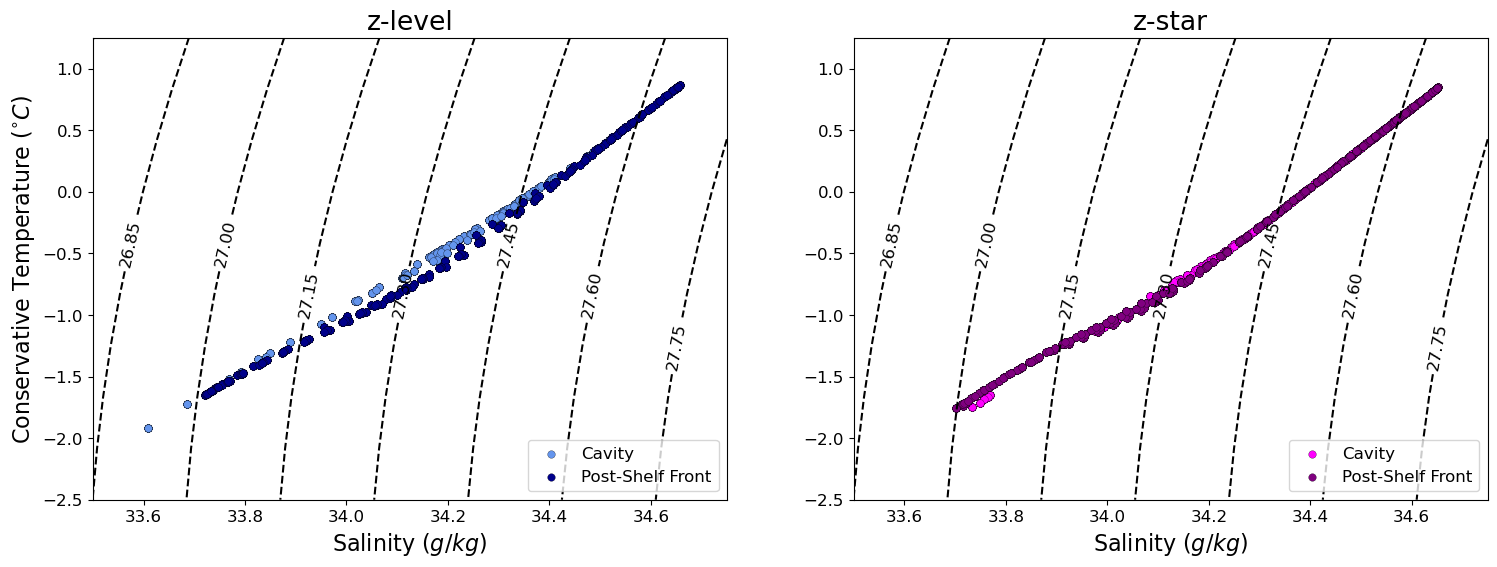

In [56]:
## salinity plot

tidx = -1

fig,ax=plt.subplots(1,2,figsize=(18,6))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.5,1.25,10)
si = np.linspace(33.5,34.75,10)
dens = np.zeros((len(si),len(ti)))

# Loop to fill in grid with densities
for j in range(0,len(ti)):
    for i in range(0, len(si)):
        dens[j,i]=gsw.density.sigma0(si[i],ti[j])
 
CS = ax[0].contour(si,ti,dens, linestyles='dashed', colors='k')
ax[0].clabel(CS, fontsize=12, inline=1, fmt='%1.2f') # Label every second level

CS = ax[1].contour(si,ti,dens, linestyles='dashed', colors='k')
ax[1].clabel(CS, fontsize=12, inline=1, fmt='%1.2f') # Label every second level

## plot cells inside of the cavity
ax[0].scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=cavitySubSec_zlev5km),
            cons_temp_zlev5km.isel(Time=tidx,nCells=cavitySubSec_zlev5km),
               s=30, color='cornflowerblue',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Cavity')
ax[0].scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=postShelfSubSec_zlev5km),
            cons_temp_zlev5km.isel(Time=tidx,nCells=postShelfSubSec_zlev5km),
               s=30, color='darkblue',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Post-Shelf Front')
ax[1].scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=cavitySubSec_zstar5km),
            cons_temp_zstar5km.isel(Time=tidx,nCells=cavitySubSec_zstar5km),
               s=30, color='magenta',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Cavity')
ax[1].scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=postShelfSubSec_zstar5km),
            cons_temp_zstar5km.isel(Time=tidx,nCells=postShelfSubSec_zstar5km),
               s=30, color='purple',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Post-Shelf Front')

## plot cells outside of the cavity
# plt.scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=nCell_idx_outCavity_zlev5km),
#             cons_temp_zlev5km.isel(Time=tidx,nCells=nCell_idx_outCavity_zlev5km),
#                s=20, color='darkslateblue',edgecolor='k', linewidths=0.2, marker='s')
# plt.scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=nCell_idx_outCavity_zstar5km),
#             cons_temp_zstar5km.isel(Time=tidx,nCells=nCell_idx_outCavity_zstar5km),
#                s=20, color='darkorange',edgecolor='k', linewidths=0.2, marker='*')

ax[0].set_xlabel('Salinity ($g/kg$)')
ax[0].legend(fontsize=12, loc='lower right')
ax[0].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_title('z-level')

ax[1].set_xlabel('Salinity ($g/kg$)')
ax[1].legend(fontsize=12, loc='lower right')
# ax[1].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_title('z-star')

# ax.set_yscale('log')

plt.show()

Just plot within the cavity

In [7]:
cavitySubSec_zlev5km = []
cSSlevs_match_zlev5km = []
postShelfSubSec_zlev5km = []
pSSlevs_match_zlev5km = []
for lev in range(len(ds_output_zlev5km.nVertLevels)):
    for i in nCell_idx_inCavity_zlev5km:
        if (ds_output_zlev5km.xCell.sel(nCells=i).values <= 639000): 
            cavitySubSec_zlev5km.append(i.values)
            cSSlevs_match_zlev5km.append(lev)
    for j in nCell_idx_outCavity_zlev5km:
        if (ds_output_zlev5km.xCell.sel(nCells=j).values >= 650000 and \
           ds_output_zlev5km.xCell.sel(nCells=j).values <= 675000 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values >= -550 and \
           ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values <= -350): 
            postShelfSubSec_zlev5km.append(j.values)
            pSSlevs_match_zlev5km.append(lev)
            
cavitySubSec_zstar5km = []
cSSlevs_match_zstar5km = []
postShelfSubSec_zstar5km = []
pSSlevs_match_zstar5km = []
for lev in range(len(ds_output_zstar5km.nVertLevels)):
    for i in nCell_idx_inCavity_zstar5km:
        if (ds_output_zstar5km.xCell.sel(nCells=i).values <= 639000): 
            cavitySubSec_zstar5km.append(i.values)
            cSSlevs_match_zstar5km.append(lev)
    for j in nCell_idx_outCavity_zstar5km:
        if (ds_output_zstar5km.xCell.sel(nCells=j).values >= 650000 and \
           ds_output_zstar5km.xCell.sel(nCells=j).values <= 675000 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values >= -550 and \
           ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=lev,nCells=j).values <= -350): 
            postShelfSubSec_zstar5km.append(j.values)
            pSSlevs_match_zstar5km.append(lev)

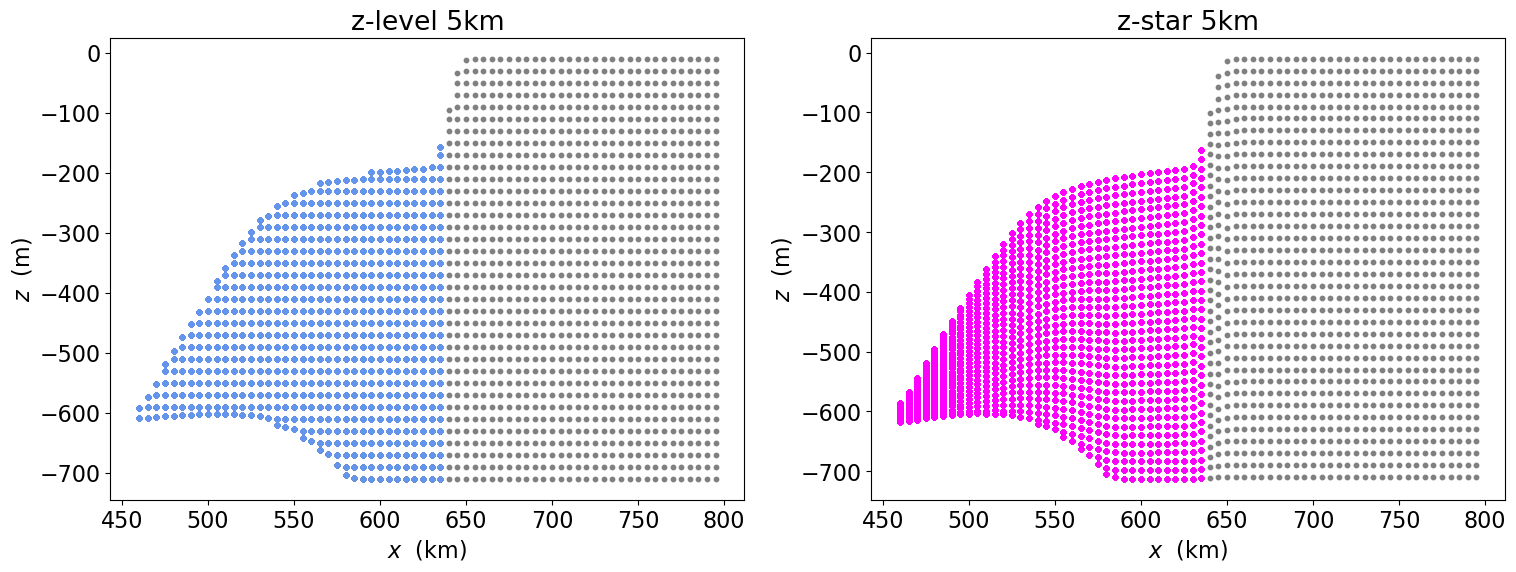

In [8]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
for i in range(len(ds_output_zlev5km.nVertLevels)):
    ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=larger_same_y_idx_zlev5km[9])/1000.,
                ds_output_zlev5km.zMid.isel(Time=0,nVertLevels=i,nCells=larger_same_y_idx_zlev5km[9]),
               color='grey',s=10)
    for c in range(len(cavitySubSec_zlev5km)):
        ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=cavitySubSec_zlev5km[c])/1000.,
                ds_output_zlev5km.zMid.isel(Time=0,nCells=cavitySubSec_zlev5km[c],nVertLevels=cSSlevs_match_zlev5km[c]),
               color='cornflowerblue',s=10)
    # for c in range(len(postShelfSubSec_zlev5km)):
    #     ax[0].scatter(ds_output_zlev5km.xCell.isel(nCells=postShelfSubSec_zlev5km[c])/1000.,
    #             ds_output_zlev5km.zMid.isel(Time=0,nCells=postShelfSubSec_zlev5km[c],nVertLevels=pSSlevs_match_zlev5km[c]),
    #            color='darkblue',s=10)
        
    ax[0].set_title('z-level 5km')
    ax[0].set_xlabel('$x$  (km)')
    ax[0].set_ylabel('$z$  (m)')
    
for i in range(len(ds_output_zstar5km.nVertLevels)):
    ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=larger_same_y_idx_zstar5km[9])/1000.,
                ds_output_zstar5km.zMid.isel(Time=0,nVertLevels=i,nCells=larger_same_y_idx_zstar5km[9]),
               color='grey',s=10)
    for c in range(len(cavitySubSec_zstar5km)):
        ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=cavitySubSec_zstar5km[c])/1000.,
                ds_output_zstar5km.zMid.isel(Time=0,nCells=cavitySubSec_zstar5km[c],nVertLevels=cSSlevs_match_zstar5km[c]),
               color='magenta',s=10)
    # for c in range(len(postShelfSubSec_zstar5km)):
    #     ax[1].scatter(ds_output_zstar5km.xCell.isel(nCells=postShelfSubSec_zstar5km[c])/1000.,
    #             ds_output_zstar5km.zMid.isel(Time=0,nCells=postShelfSubSec_zstar5km[c],nVertLevels=pSSlevs_match_zstar5km[c]),
    #            color='purple',s=10)
    ax[1].set_title('z-star 5km')
    ax[1].set_xlabel('$x$  (km)')
    ax[1].set_ylabel('$z$  (m)')
plt.show()

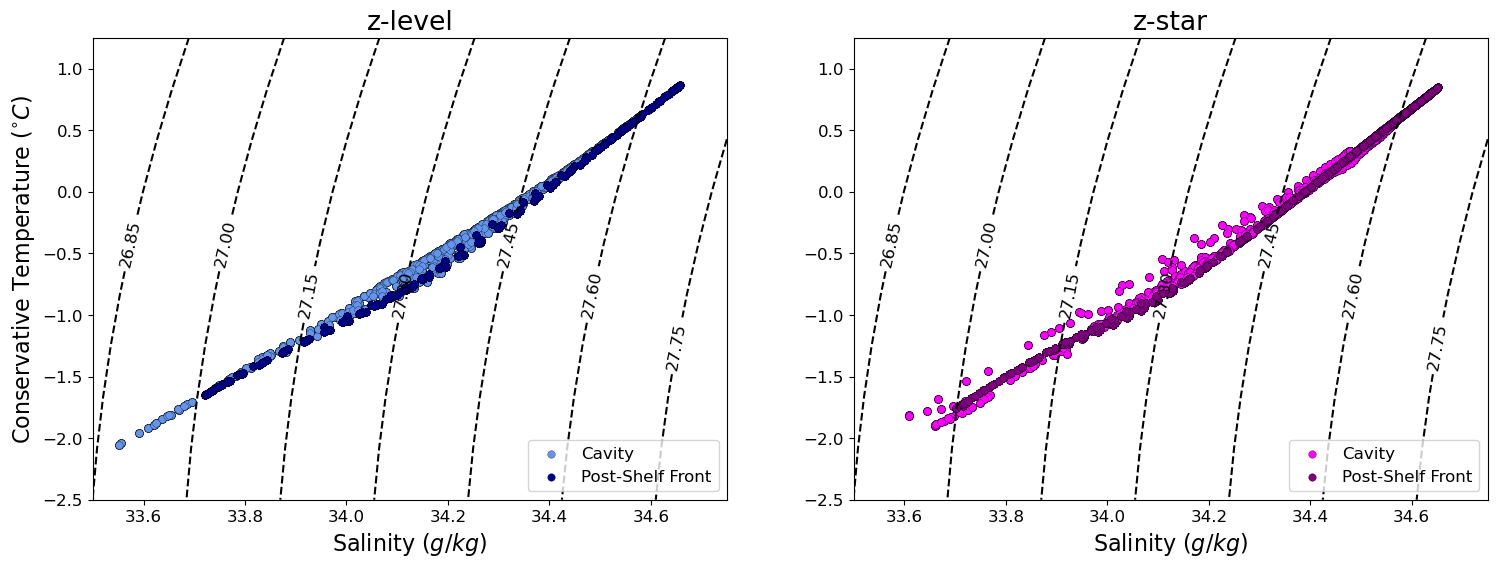

In [9]:
## salinity plot

tidx = -1

fig,ax=plt.subplots(1,2,figsize=(18,6))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.5,1.25,10)
si = np.linspace(33.5,34.75,10)
dens = np.zeros((len(si),len(ti)))

# Loop to fill in grid with densities
for j in range(0,len(ti)):
    for i in range(0, len(si)):
        dens[j,i]=gsw.density.sigma0(si[i],ti[j])
 
CS = ax[0].contour(si,ti,dens, linestyles='dashed', colors='k')
ax[0].clabel(CS, fontsize=12, inline=1, fmt='%1.2f') # Label every second level

CS = ax[1].contour(si,ti,dens, linestyles='dashed', colors='k')
ax[1].clabel(CS, fontsize=12, inline=1, fmt='%1.2f') # Label every second level

## plot cells inside of the cavity
ax[0].scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=cavitySubSec_zlev5km),
            cons_temp_zlev5km.isel(Time=tidx,nCells=cavitySubSec_zlev5km),
               s=30, color='cornflowerblue',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Cavity')
ax[0].scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=postShelfSubSec_zlev5km),
            cons_temp_zlev5km.isel(Time=tidx,nCells=postShelfSubSec_zlev5km),
               s=30, color='darkblue',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Post-Shelf Front')
ax[1].scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=cavitySubSec_zstar5km),
            cons_temp_zstar5km.isel(Time=tidx,nCells=cavitySubSec_zstar5km),
               s=30, color='magenta',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Cavity')
ax[1].scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=postShelfSubSec_zstar5km),
            cons_temp_zstar5km.isel(Time=tidx,nCells=postShelfSubSec_zstar5km),
               s=30, color='purple',edgecolor='k', linewidths=0.2, marker='o',alpha=1, label='Post-Shelf Front')

## plot cells outside of the cavity
# plt.scatter(ds_output_zlev5km.salinity.isel(Time=tidx,nCells=nCell_idx_outCavity_zlev5km),
#             cons_temp_zlev5km.isel(Time=tidx,nCells=nCell_idx_outCavity_zlev5km),
#                s=20, color='darkslateblue',edgecolor='k', linewidths=0.2, marker='s')
# plt.scatter(ds_output_zstar5km.salinity.isel(Time=tidx,nCells=nCell_idx_outCavity_zstar5km),
#             cons_temp_zstar5km.isel(Time=tidx,nCells=nCell_idx_outCavity_zstar5km),
#                s=20, color='darkorange',edgecolor='k', linewidths=0.2, marker='*')

ax[0].set_xlabel('Salinity ($g/kg$)')
ax[0].legend(fontsize=12, loc='lower right')
ax[0].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_title('z-level')

ax[1].set_xlabel('Salinity ($g/kg$)')
ax[1].legend(fontsize=12, loc='lower right')
# ax[1].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_title('z-star')

# ax.set_yscale('log')

plt.show()

Brunt-Vaisala Frequency:

In [127]:
# gsw.stability.Nsquared(SA, CT, p, lat=None, axis=0)

BV_freq_zlev5km = gsw.stability.Nsquared(ds_output_zlev5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), cons_temp_zlev5km.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), ds_timeMonthly_zlev5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), lat=None, axis=0)[0]
BV_freq_zstar5km = gsw.stability.Nsquared(ds_output_zstar5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), cons_temp_zstar5km.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), ds_timeMonthly_zstar5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), lat=None, axis=0)[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


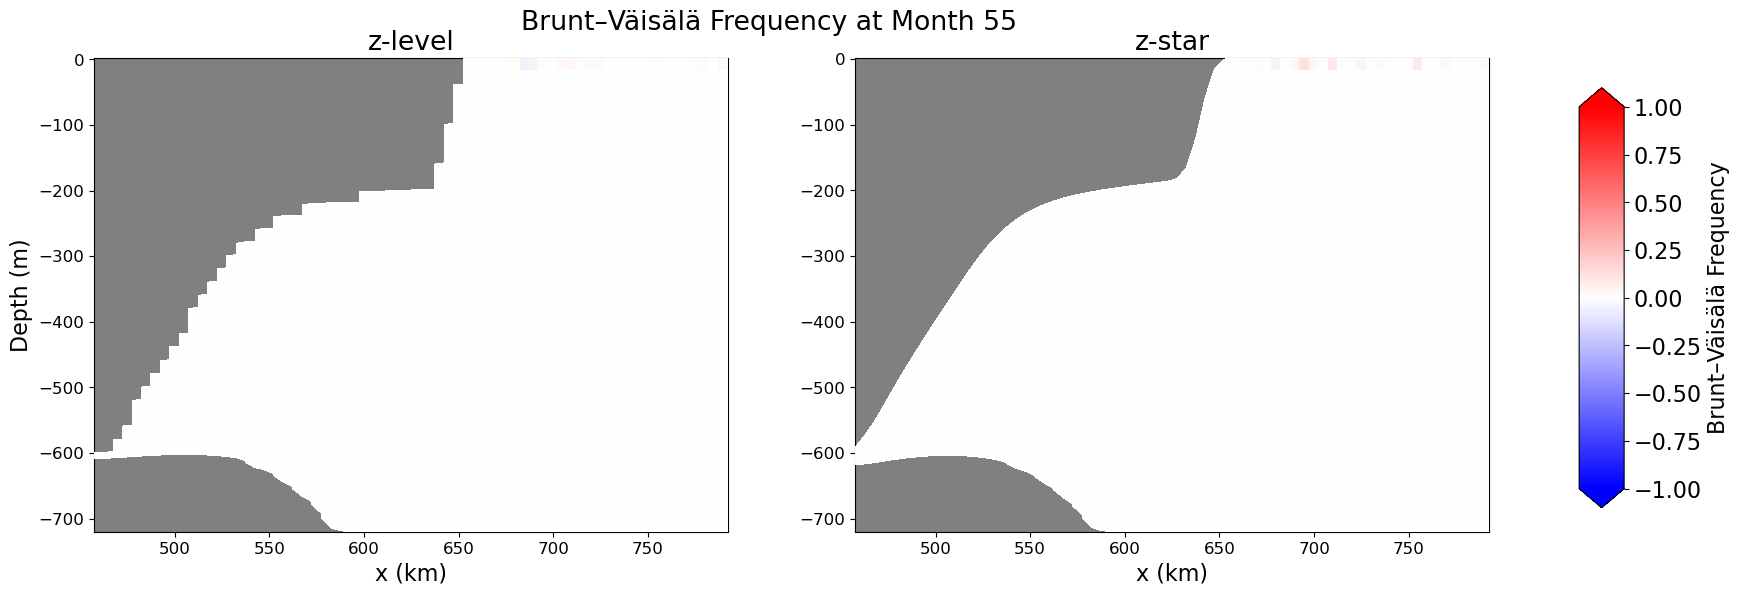

In [131]:
## salinity plot

tidx = -1

fig,ax=plt.subplots(1,2,figsize=(18,6))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.5,1.25,10)
si = np.linspace(33.5,34.75,10)
dens = np.zeros((len(si),len(ti)))

# Loop to fill in grid with densities
for j in range(0,len(ti)):
    for i in range(0, len(si)):
        dens[j,i]=gsw.density.sigma0(si[i],ti[j])
 
## plot cells inside of the cavity
reshaped_xCell = [ds_output_zlev5km.xCell.isel(nCells=larger_same_y_idx_zlev5km[9][:-1]).values for i in range(len(ds_output_zlev5km.nVertLevels))]
reshaped_xCell = np.array(reshaped_xCell)
reshaped_xCell = np.transpose(reshaped_xCell)
im = ax[0].pcolor(reshaped_xCell/1000.,ds_output_zlev5km.zMid.isel(Time=tidx,nCells=larger_same_y_idx_zlev5km[9][:-1]).values,BV_freq_zlev5km, 
                         vmin=-1,vmax=1,cmap="bwr",alpha=1,zorder=10)
reshaped_xCell = [ds_output_zstar5km.xCell.isel(nCells=larger_same_y_idx_zstar5km[9][:-1]).values for i in range(len(ds_output_zstar5km.nVertLevels))]
reshaped_xCell = np.array(reshaped_xCell)
reshaped_xCell = np.transpose(reshaped_xCell)
ax[1].pcolor(reshaped_xCell/1000.,ds_output_zstar5km.zMid.isel(Time=tidx,nCells=larger_same_y_idx_zstar5km[9][:-1]).values,BV_freq_zstar5km, 
                         vmin=-1,vmax=1,cmap="bwr",alpha=1,zorder=10)

ax[0].set_xlabel('x (km)')
ax[0].legend(fontsize=12, loc='lower right')
ax[0].set_ylabel('Depth (m)')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_title('z-level')
ax[0].set_facecolor('grey')

ax[1].set_xlabel('x (km)')
ax[1].legend(fontsize=12, loc='lower right')
# ax[1].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_title('z-star')
ax[1].set_facecolor('grey')

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])

fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Brunt–Väisälä Frequency', extend="both")

# ax.set_yscale('log')
plt.suptitle('Brunt–Väisälä Frequency at Month 55')
plt.show()

In [133]:
# gsw.stability.IPV_vs_fNsquared_ratio(SA, CT, p, p_ref=0, axis=0) ## it says CT , but docs say in-situ temperature ??
ratio_zlev5km = gsw.stability.IPV_vs_fNsquared_ratio(ds_output_zlev5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), cons_temp_zlev5km.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), ds_timeMonthly_zlev5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), axis=0)[0]
ratio_zstar5km = gsw.stability.IPV_vs_fNsquared_ratio(ds_output_zstar5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), cons_temp_zstar5km.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), ds_timeMonthly_zstar5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]),  axis=0)[0]

In [136]:
## do this with potential temperature
# gsw.stability.IPV_vs_fNsquared_ratio(SA, CT, p, p_ref=0, axis=0) ## it says CT , but docs say in-situ temperature ??
ratio_zlev5km = gsw.stability.IPV_vs_fNsquared_ratio(ds_output_zlev5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), ds_output_zlev5km.temperature.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), ds_timeMonthly_zlev5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zlev5km[9]), axis=0)[0]
ratio_zstar5km = gsw.stability.IPV_vs_fNsquared_ratio(ds_output_zstar5km.salinity.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), ds_output_zstar5km.temperature.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]), ds_timeMonthly_zstar5km.timeMonthly_avg_pressure.isel(Time=-1,nCells=larger_same_y_idx_zstar5km[9]),  axis=0)[0]

Calculates the ratio of the vertical gradient of potential density to
    the vertical gradient of locally-referenced potential density.  This
    is also the ratio of the planetary Isopycnal Potential Vorticity
    (IPV) to f times N^2, hence the name for this variable,
    IPV_vs_fNsquared_ratio (see Eqn. (3.20.17) of IOC et al. (2010))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


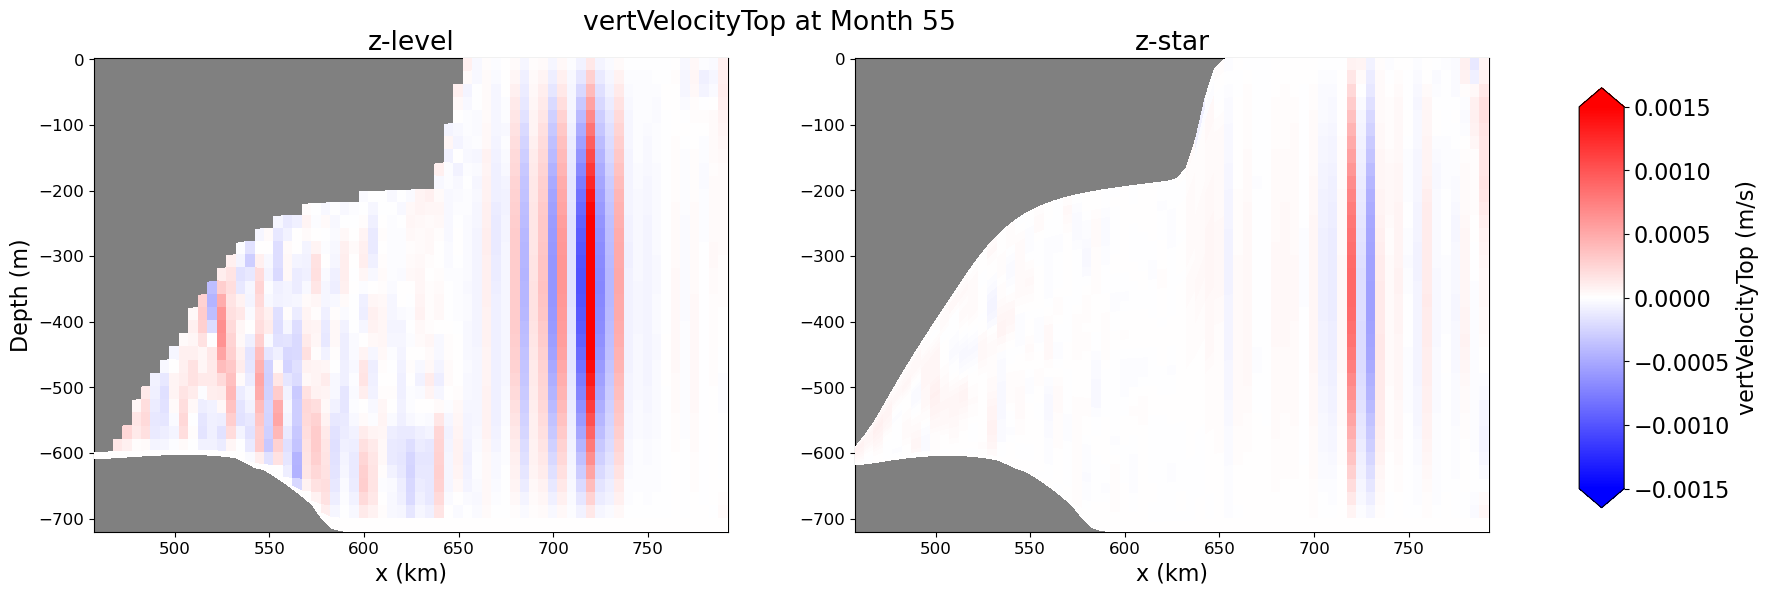

In [153]:
## salinity plot

tidx = -1

fig,ax=plt.subplots(1,2,figsize=(18,6))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.5,1.25,10)
si = np.linspace(33.5,34.75,10)
dens = np.zeros((len(si),len(ti)))

# Loop to fill in grid with densities
for j in range(0,len(ti)):
    for i in range(0, len(si)):
        dens[j,i]=gsw.density.sigma0(si[i],ti[j])
 
## plot cells inside of the cavity
reshaped_xCell = [ds_output_zlev5km.xCell.isel(nCells=larger_same_y_idx_zlev5km[9][:-1]).values for i in range(len(ds_output_zlev5km.nVertLevels))]
reshaped_xCell = np.array(reshaped_xCell)
reshaped_xCell = np.transpose(reshaped_xCell)
im = ax[0].pcolor(reshaped_xCell/1000.,ds_output_zlev5km.zMid.isel(Time=tidx,nCells=larger_same_y_idx_zlev5km[9][:-1]).values,ds_output_zlev5km.vertVelocityTop.isel(Time=tidx,nCells=larger_same_y_idx_zlev5km[9][:-1],nVertLevelsP1=slice(1,37)), 
                         vmin=-0.0015,vmax=0.0015,cmap="bwr",alpha=1,zorder=10)
reshaped_xCell = [ds_output_zstar5km.xCell.isel(nCells=larger_same_y_idx_zstar5km[9][:-1]).values for i in range(len(ds_output_zstar5km.nVertLevels))]
reshaped_xCell = np.array(reshaped_xCell)
reshaped_xCell = np.transpose(reshaped_xCell)
ax[1].pcolor(reshaped_xCell/1000.,ds_output_zstar5km.zMid.isel(Time=tidx,nCells=larger_same_y_idx_zstar5km[9][:-1]).values,ds_output_zstar5km.vertVelocityTop.isel(Time=tidx,nCells=larger_same_y_idx_zlev5km[9][:-1],nVertLevelsP1=slice(1,37)), 
                         vmin=-0.0015,vmax=0.0015,cmap="bwr",alpha=1,zorder=10)

ax[0].set_xlabel('x (km)')
ax[0].legend(fontsize=12, loc='lower right')
ax[0].set_ylabel('Depth (m)')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_title('z-level')
ax[0].set_facecolor('grey')

ax[1].set_xlabel('x (km)')
ax[1].legend(fontsize=12, loc='lower right')
# ax[1].set_ylabel('Conservative Temperature ($^{\circ}C$)')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_title('z-star')
ax[1].set_facecolor('grey')

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])

fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'vertVelocityTop (m/s)', extend="both")

# ax.set_yscale('log')
plt.suptitle('vertVelocityTop at Month 55')
plt.show()

plot velocity

In [152]:
ds_output_zlev5km.vertVelocityTop

<xarray.DataArray 'vertVelocityTop' (Time: 55, nCells: 1146, nVertLevelsP1: 37)> Size: 19MB
array([[[-1.891226e-07, -1.891226e-07, ...,  0.000000e+00,  0.000000e+00],
        [-3.243454e-07, -3.243454e-07, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [ 6.082453e-06, -4.079107e-05, ...,  2.410879e-05,  0.000000e+00],
        [ 6.102643e-06, -1.480990e-04, ...,  4.940645e-05,  0.000000e+00]],

       [[ 2.264213e-07,  2.264213e-07, ...,  0.000000e+00,  0.000000e+00],
        [ 2.611331e-07,  2.611331e-07, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [-2.740660e-07,  8.027938e-05, ...,  2.110503e-05,  0.000000e+00],
        [-2.568559e-07, -2.640875e-04, ...,  5.672467e-05,  0.000000e+00]],

       ...,

       [[-1.434244e-07, -1.434244e-07, ...,  0.000000e+00,  0.000000e+00],
        [-3.348098e-07, -3.348098e-07, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [ 5.526591e-06,  5.564039e-04, ...,  3.263010e-05,  0.000000e+00],
        [ 5.526809e-06, -1.363382e-03, ...,  3.846184e-05,  0.000000e+00]],

       [[ 7.153632e-08,  7.153632e-08, ...,  0.000000e+00,  0.000000e+00],
        [ 1.227208e-07,  1.227208e-07, ...,  0.000000e+00,  0.000000e+00],
        ...,
        [ 5.502202e-06,  4.509905e-04, ...,  1.400697e-05,  0.000000e+00],
        [ 5.485837e-06, -1.120703e-03, ...,  6.111081e-05,  0.000000e+00]]])
Dimensions without coordinates: Time, nCells, nVertLevelsP1
Attributes:
    units:      m s^-1
    long_name:  vertical velocity defined at center (horizontally) and top (v...